In [2]:
pip install torch torch-geometric scikit-learn pandas numpy matplotlib rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29

Mounted at /content/drive
hd=64 dp=0.0 lr=0.001 → MSE 1.1632 ± 0.1185
hd=64 dp=0.0 lr=0.0005 → MSE 1.2192 ± 0.1148
hd=64 dp=0.2 lr=0.001 → MSE 1.1464 ± 0.1081
hd=64 dp=0.2 lr=0.0005 → MSE 1.2018 ± 0.0931
hd=128 dp=0.0 lr=0.001 → MSE 1.1465 ± 0.1561
hd=128 dp=0.0 lr=0.0005 → MSE 1.1880 ± 0.1221
hd=128 dp=0.2 lr=0.001 → MSE 1.1126 ± 0.1056
hd=128 dp=0.2 lr=0.0005 → MSE 1.1572 ± 0.1133
✅ Saved regression hyperparameter sweep
✅ Saved regression CV summary


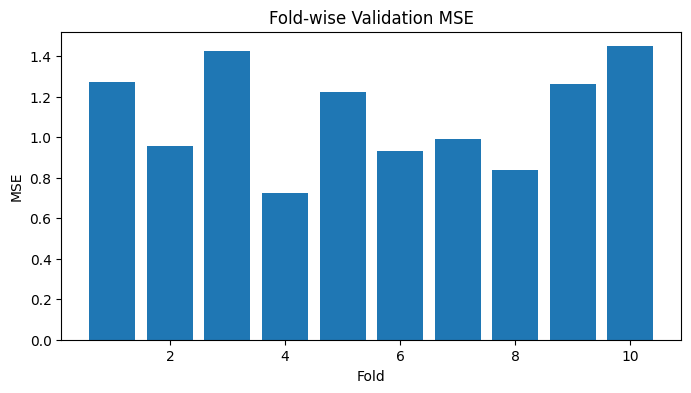

Ensemble Test → MSE: 1.0819, MAE: 0.8285, R²: 0.1857


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 001 | TrainLoss 5.0637 | ValMSE 1.1976
Epoch 002 | TrainLoss 1.2383 | ValMSE 1.2405
Epoch 003 | TrainLoss 1.2067 | ValMSE 1.2118
Epoch 004 | TrainLoss 1.1871 | ValMSE 1.1154
Epoch 005 | TrainLoss 1.1482 | ValMSE 1.0848
Epoch 006 | TrainLoss 1.1023 | ValMSE 1.0325
Epoch 007 | TrainLoss 1.0420 | ValMSE 1.0516
Epoch 008 | TrainLoss 1.0006 | ValMSE 0.9585
Epoch 009 | TrainLoss 0.9754 | ValMSE 0.9522
Epoch 010 | TrainLoss 0.9430 | ValMSE 0.9120
Epoch 011 | TrainLoss 0.9181 | ValMSE 0.9052
Epoch 012 | TrainLoss 0.9372 | ValMSE 1.0779
Epoch 013 | TrainLoss 0.9110 | ValMSE 0.8975
Epoch 014 | TrainLoss 0.9102 | ValMSE 0.8890
Epoch 015 | TrainLoss 0.8858 | ValMSE 0.8770
Epoch 016 | TrainLoss 0.8920 | ValMSE 0.9418
Epoch 017 | TrainLoss 0.8923 | ValMSE 0.9056
Epoch 018 | TrainLoss 0.8820 | ValMSE 0.8776
Epoch 019 | TrainLoss 0.8744 | ValMSE 1.0209
Epoch 020 | TrainLoss 0.8786 | ValMSE 0.9127
Epoch 021 | TrainLoss 0.8570 | ValMSE 0.8511
Epoch 022 | TrainLoss 0.8703 | ValMSE 0.8531
Epoch 023 

In [4]:
# Step 1: Mount Drive & Imports
from google.colab import drive
drive.mount('/content/drive')

import os, random
import torch
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import StratifiedShuffleSplit

# Reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark    = False

def seed_worker(worker_id):
    wseed = seed + worker_id
    np.random.seed(wseed)
    random.seed(wseed)

generator = torch.Generator().manual_seed(seed)
device    = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 📁 Paths
root_dir    = "/content/drive/MyDrive/GNN_model_TRPM8_Drug_Potency_prediction/GNN_model_TRPM8_Drug_Potency_prediction-Dolapo"
base_path   = os.path.join(root_dir, "4_train_test_split/10fold_cv/regression")
results_dir = os.path.join(root_dir, "GCN_results/regression_10fold")
os.makedirs(results_dir, exist_ok=True)

kfold = 10
task  = "regression"

# Step 2: GCN Regression Model
class GCNReg(torch.nn.Module):
    def __init__(self, in_dim, hidden_dim, dropout=0.0):
        super().__init__()
        self.conv1   = GCNConv(in_dim, hidden_dim)
        self.conv2   = GCNConv(hidden_dim, hidden_dim)
        self.dropout = dropout
        self.lin     = torch.nn.Linear(hidden_dim, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv2(x, edge_index))
        x = global_mean_pool(x, data.batch)
        return self.lin(x)

# Step 3: Evaluation helper for regression
def evaluate(model, loader):
    model.eval()
    preds, labels = [], []
    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            out   = model(batch)          # shape [batch_size,1]
            preds.append(out.cpu().view(-1))
            labels.append(batch.y.cpu().view(-1))
    preds  = torch.cat(preds)
    labels = torch.cat(labels)
    return preds, labels

# Step 4: Hyperparameter Sweep (10-Fold CV)
hidden_dims = [64, 128]
dropouts    = [0.0, 0.2]
lrs         = [1e-3, 5e-4]

sweep_results = []
for hd in hidden_dims:
    for dp in dropouts:
        for lr in lrs:
            fold_mses = []
            for fold in range(kfold):
                # load splits with weights_only disabled
                tr_data = torch.load(
                    os.path.join(base_path, f"{task}_train_fold{fold}.pt"),
                    weights_only=False
                )
                vl_data = torch.load(
                    os.path.join(base_path, f"{task}_val_fold{fold}.pt"),
                    weights_only=False
                )

                tr_loader = DataLoader(
                    tr_data, batch_size=32, shuffle=True,
                    worker_init_fn=seed_worker, generator=generator
                )
                vl_loader = DataLoader(vl_data, batch_size=32)

                # init model & optimizer
                model     = GCNReg(
                    in_dim=tr_data[0].x.size(1),
                    hidden_dim=hd,
                    dropout=dp
                ).to(device)
                optimizer = torch.optim.Adam(model.parameters(), lr=lr)

                # train for 50 epochs
                for epoch in range(50):
                    model.train()
                    for batch in tr_loader:
                        batch = batch.to(device)
                        optimizer.zero_grad()
                        out    = model(batch).view(-1)
                        target = batch.y.view(-1).float()
                        loss   = F.mse_loss(out, target)
                        loss.backward()
                        optimizer.step()

                # validation MSE
                preds, labels = evaluate(model, vl_loader)
                mse = mean_squared_error(labels.numpy(), preds.numpy())
                fold_mses.append(mse)

            mean_mse = np.mean(fold_mses)
            std_mse  = np.std(fold_mses)
            sweep_results.append({
                "hidden_dim": hd,
                "dropout":    dp,
                "lr":         lr,
                "mean_mse":   mean_mse,
                "std_mse":    std_mse
            })
            print(f"hd={hd} dp={dp} lr={lr} → MSE {mean_mse:.4f} ± {std_mse:.4f}")

sweep_df = pd.DataFrame(sweep_results)
sweep_df.to_csv(os.path.join(results_dir, "gcn_regression_sweep.csv"), index=False)
print("Saved regression hyperparameter sweep")

# Step 5: Retrain Each Fold & Save CV Summary
best = sweep_df.loc[sweep_df["mean_mse"].idxmin()]
best_hd, best_dp, best_lr = int(best.hidden_dim), float(best.dropout), float(best.lr)

fold_metrics = []
for fold in range(kfold):
    tr_data = torch.load(
        os.path.join(base_path, f"{task}_train_fold{fold}.pt"),
        weights_only=False
    )
    vl_data = torch.load(
        os.path.join(base_path, f"{task}_val_fold{fold}.pt"),
        weights_only=False
    )

    tr_loader = DataLoader(
        tr_data, batch_size=32, shuffle=True,
        worker_init_fn=seed_worker, generator=generator
    )
    vl_loader = DataLoader(vl_data, batch_size=32)

    model     = GCNReg(tr_data[0].x.size(1), best_hd, dropout=best_dp).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=best_lr)
    best_vloss, patience = float("inf"), 0

    for epoch in range(1, 101):
        model.train()
        for batch in tr_loader:
            batch = batch.to(device)
            optimizer.zero_grad()
            out    = model(batch).view(-1)
            target = batch.y.view(-1).float()
            loss   = F.mse_loss(out, target)
            loss.backward()
            optimizer.step()

        # validation
        preds, labels = evaluate(model, vl_loader)
        vloss = mean_squared_error(labels.numpy(), preds.numpy())

        if vloss < best_vloss:
            best_vloss, patience = vloss, 0
            torch.save(
                model.state_dict(),
                os.path.join(results_dir, f"fold{fold+1}_model.pt")
            )
        else:
            patience += 1
            if patience >= 10:
                break

    # compute metrics on this fold
    preds, labels = evaluate(model, vl_loader)
    y_true = labels.numpy()
    y_pred = preds.numpy()
    mse    = mean_squared_error(y_true, y_pred)
    mae    = mean_absolute_error(y_true, y_pred)
    r2     = r2_score(y_true, y_pred)

    fold_metrics.append({
        "fold": fold+1,
        "mse":   mse,
        "mae":   mae,
        "r2":    r2
    })

cv_df = pd.DataFrame(fold_metrics)
cv_df.to_csv(
    os.path.join(results_dir, "gcn_regression_cv_summary.csv"),
    index=False
)
print("Saved regression CV summary")

# Step 6: Plot CV Results (MSE per fold)
cv_df = pd.read_csv(os.path.join(results_dir, "gcn_regression_cv_summary.csv"))
plt.figure(figsize=(8,4))
plt.bar(cv_df["fold"], cv_df["mse"])
plt.title("Fold-wise Validation MSE"); plt.xlabel("Fold"); plt.ylabel("MSE")
plt.show()

# Step 7: Ensemble Averaging on Test Set
test_data   = torch.load(
    os.path.join(base_path, f"{task}_test.pt"),
    weights_only=False
)
test_loader = DataLoader(test_data, batch_size=32)
all_preds   = []

for fold in range(kfold):
    model = GCNReg(
        test_data[0].x.size(1), best_hd, dropout=best_dp
    ).to(device)
    model.load_state_dict(
        torch.load(
            os.path.join(results_dir, f"fold{fold+1}_model.pt"),
            weights_only=False
        )
    )
    model.eval()
    preds_fold = []
    with torch.no_grad():
        for b in test_loader:
            preds_fold.append(model(b.to(device)).cpu().view(-1))
    all_preds.append(torch.cat(preds_fold))

avg_preds = torch.stack(all_preds).mean(0)
y_true    = torch.cat([d.y for d in test_data]).view(-1).numpy()
y_pred    = avg_preds.numpy()

# Ensemble metrics
mse_e = mean_squared_error(y_true, y_pred)
mae_e = mean_absolute_error(y_true, y_pred)
r2_e  = r2_score(y_true, y_pred)
print(f"Ensemble Test → MSE: {mse_e:.4f}, MAE: {mae_e:.4f}, R²: {r2_e:.4f}")

# Step 8: Final Training on Combined Data & Test Eval
all_data = []
for f in range(kfold):
    all_data += torch.load(
        os.path.join(base_path, f"{task}_train_fold{f}.pt"),
        weights_only=False
    )
    all_data += torch.load(
        os.path.join(base_path, f"{task}_val_fold{f}.pt"),
        weights_only=False
    )

labels = [float(d.y.item()) for d in all_data]
sss    = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=seed)
tr_idx, vl_idx = next(sss.split(all_data, labels))
train_split = [all_data[i] for i in tr_idx]
val_split   = [all_data[i] for i in vl_idx]

tr_loader = DataLoader(train_split, batch_size=32, shuffle=True,
                       worker_init_fn=seed_worker, generator=generator)
vl_loader = DataLoader(val_split,   batch_size=32)

model     = GCNReg(all_data[0].x.size(1), best_hd, dropout=best_dp).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=best_lr)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode="min", patience=5, factor=0.5, verbose=True
)

best_vloss, patience = float("inf"), 0
for epoch in range(1, 301):
    model.train()
    tot_loss = 0
    for b in tr_loader:
        b = b.to(device)
        optimizer.zero_grad()
        out    = model(b).view(-1)
        target = b.y.view(-1).float()
        loss   = F.mse_loss(out, target)
        loss.backward()
        optimizer.step()
        tot_loss += loss.item()

    preds, labels = evaluate(model, vl_loader)
    vloss = mean_squared_error(labels.numpy(), preds.numpy())
    scheduler.step(vloss)

    if vloss < best_vloss:
        best_vloss, patience = vloss, 0
        torch.save(model.state_dict(), os.path.join(results_dir, "gcn_final_model.pt"))
    else:
        patience += 1
        if patience >= 10:
            break

    print(f"Epoch {epoch:03d} | TrainLoss {tot_loss/len(tr_loader):.4f} | ValMSE {vloss:.4f}")

# Final test evaluation
model.load_state_dict(torch.load(os.path.join(results_dir, "gcn_final_model.pt"), weights_only=False))
test_loader = DataLoader(
    torch.load(os.path.join(base_path, f"{task}_test.pt"), weights_only=False),
    batch_size=32
)
preds, labels = evaluate(model, test_loader)
y_true = labels.numpy()
y_pred = preds.numpy()

mse_f = mean_squared_error(y_true, y_pred)
mae_f = mean_absolute_error(y_true, y_pred)
r2_f  = r2_score(y_true, y_pred)

print(f"Final Model Test → MSE: {mse_f:.4f}, MAE: {mae_f:.4f}, R²: {r2_f:.4f}")

# Step 9: Baseline Comparison
# baseline = pd.read_csv(os.path.join(root_dir, "6_baseline_regression.csv"))
# comp = pd.DataFrame({
#   "GCN_Final": [mse_f],
#   "Baseline":  [baseline["mse"].iloc[0]]
# }, index=["MSE"])
# display(comp)
